# MIW 5
*Data: dane1*

In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import plot_model
import os


Using TensorFlow backend.


In [2]:
def rawData(file):
    rows = []
    file = Path(file)

    if file.exists() and file.is_file():
        with file.open() as data:
            for line in data:
                row = [float(sample) for sample in line.split()]
                rows.append(row)
    else:
        print(f"Error while openinig {file}")
    return rows

In [3]:
def preprocessData(rows):
    np.random.shuffle(rows)
    X = []
    Y = []

    for row in rows:
        X.append(row[0])
        Y.append(row[1])
    return np.array(X), np.array(Y)

In [4]:
def trainTestData(data):
    train_data_len = int(len(data) * 0.8)
    train_data = data[:train_data_len]
    test_data = data[train_data_len:]
    return train_data, test_data

In [5]:
def prepareModel():
    dense_first = Dense(units=50, input_shape=(1, ))
    activation_first = Activation('relu')
    dense_second = Dense(45)
    activation_second = Activation('relu')
    dense_third = Dense(1)

    model = Sequential([
        dense_first,
        activation_first,
        dense_second,
        activation_second,
        dense_third
    ])
    return model

In [6]:
def compileModel(model):
    return model.compile(loss='mean_squared_error',
                    optimizer='adagrad',
                    metrics=['accuracy'])

In [7]:
def fitModel(model, x_tr, y_tr, no_of_epochs):
    for i in range(100):
        model.fit(x_tr, y_tr, batch_size=32, epochs=no_of_epochs, validation_split=0.2)

In [8]:
def evaluate(test):
    pass

In [9]:
def predict(model, x_tst):
    return model.predict(x_tst)

In [10]:
def plotNsave(x_tst, y_tst, predictions, file_name):
    plt.scatter(x_tst, y_tst, c='green', label='Actual points')
    plt.scatter(x_tst, predictions, c='orange', label='Results')
    plt.legend()
    plt.savefig(file_name)
    plt.show()

In [11]:
def save_as_h5(model, model_file):
    model.save(model_file)

In [12]:
def save_as_png(model, file_name):
    plot_model(model, to_file=file_name, show_shapes=True, show_layer_names=True)

In [13]:
def main():
    os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

    data = rawData('dane1.txt')
    x_rows, y_rows = preprocessData(data)
    train_X, test_X = trainTestData(x_rows)
    train_Y, test_y = trainTestData(y_rows)

    model = prepareModel()
    compileModel(model)
    fitModel(model, train_X, train_Y, 10)
    score = model.evaluate(test_X, test_y)

    print(f'Score: {score}')

    predictions = predict(model, test_X)
    plotNsave(test_X, test_y, predictions, 'miw_s17525_result.png')

    save_as_png(model, 'miw5_s17525_model.png')
    save_as_h5(model, 'miw_s17525_model.h5')

Train on 25 samples, validate on 7 samples
Epoch 1/10
25/25 [==============================] - 1s 30ms/step - loss: 3.9773 - accuracy: 0.0000e+00 - val_loss: 2.7305 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 231us/step - loss: 2.8036 - accuracy: 0.0000e+00 - val_loss: 2.0494 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 221us/step - loss: 2.1855 - accuracy: 0.0000e+00 - val_loss: 1.5785 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 214us/step - loss: 1.7566 - accuracy: 0.0000e+00 - val_loss: 1.2469 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 500us/step - loss: 1.4446 - accuracy: 0.0000e+00 - val_loss: 1.0036 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 271us/step - loss: 1.2085 - accuracy: 0.0000e+00 - val_loss: 0.8012 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 398

Epoch 4/10
25/25 [==============================] - 0s 490us/step - loss: 0.1393 - accuracy: 0.0000e+00 - val_loss: 0.0784 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 440us/step - loss: 0.1367 - accuracy: 0.0000e+00 - val_loss: 0.0780 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 335us/step - loss: 0.1344 - accuracy: 0.0000e+00 - val_loss: 0.0772 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 323us/step - loss: 0.1319 - accuracy: 0.0000e+00 - val_loss: 0.0780 - val_accuracy: 0.0000e+00
Epoch 8/10
25/25 [==============================] - 0s 374us/step - loss: 0.1299 - accuracy: 0.0000e+00 - val_loss: 0.0769 - val_accuracy: 0.0000e+00
Epoch 9/10
25/25 [==============================] - 0s 332us/step - loss: 0.1275 - accuracy: 0.0000e+00 - val_loss: 0.0759 - val_accuracy: 0.0000e+00
Epoch 10/10
25/25 [==============================] - 0s 365us/step - loss: 0.1258 - accuracy: 0.0000

Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0783 - accuracy: 0.0000e+00 - val_loss: 0.0838 - val_accuracy: 0.0000e+00
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0777 - accuracy: 0.0000e+00 - val_loss: 0.0843 - val_accuracy: 0.0000e+00
Epoch 10/10
25/25 [==============================] - 0s 780us/step - loss: 0.0772 - accuracy: 0.0000e+00 - val_loss: 0.0840 - val_accuracy: 0.0000e+00
Train on 25 samples, validate on 7 samples
Epoch 1/10
25/25 [==============================] - 0s 489us/step - loss: 0.0767 - accuracy: 0.0000e+00 - val_loss: 0.0844 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 696us/step - loss: 0.0761 - accuracy: 0.0000e+00 - val_loss: 0.0843 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 435us/step - loss: 0.0755 - accuracy: 0.0000e+00 - val_loss: 0.0843 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 600us

Train on 25 samples, validate on 7 samples
Epoch 1/10
25/25 [==============================] - 0s 355us/step - loss: 0.0552 - accuracy: 0.0000e+00 - val_loss: 0.0755 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 490us/step - loss: 0.0548 - accuracy: 0.0000e+00 - val_loss: 0.0755 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 591us/step - loss: 0.0545 - accuracy: 0.0000e+00 - val_loss: 0.0752 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 648us/step - loss: 0.0541 - accuracy: 0.0000e+00 - val_loss: 0.0750 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 530us/step - loss: 0.0538 - accuracy: 0.0000e+00 - val_loss: 0.0745 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 661us/step - loss: 0.0535 - accuracy: 0.0000e+00 - val_loss: 0.0744 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 31

Epoch 4/10
25/25 [==============================] - 0s 352us/step - loss: 0.0397 - accuracy: 0.0000e+00 - val_loss: 0.0620 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 573us/step - loss: 0.0395 - accuracy: 0.0000e+00 - val_loss: 0.0609 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 551us/step - loss: 0.0392 - accuracy: 0.0000e+00 - val_loss: 0.0616 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 543us/step - loss: 0.0390 - accuracy: 0.0000e+00 - val_loss: 0.0613 - val_accuracy: 0.0000e+00
Epoch 8/10
25/25 [==============================] - 0s 532us/step - loss: 0.0388 - accuracy: 0.0000e+00 - val_loss: 0.0613 - val_accuracy: 0.0000e+00
Epoch 9/10
25/25 [==============================] - 0s 594us/step - loss: 0.0385 - accuracy: 0.0000e+00 - val_loss: 0.0608 - val_accuracy: 0.0000e+00
Epoch 10/10
25/25 [==============================] - 0s 346us/step - loss: 0.0384 - accuracy: 0.0000

Epoch 8/10
25/25 [==============================] - 0s 656us/step - loss: 0.0273 - accuracy: 0.0000e+00 - val_loss: 0.0428 - val_accuracy: 0.0000e+00
Epoch 9/10
25/25 [==============================] - 0s 522us/step - loss: 0.0271 - accuracy: 0.0000e+00 - val_loss: 0.0424 - val_accuracy: 0.0000e+00
Epoch 10/10
25/25 [==============================] - 0s 398us/step - loss: 0.0269 - accuracy: 0.0000e+00 - val_loss: 0.0423 - val_accuracy: 0.0000e+00
Train on 25 samples, validate on 7 samples
Epoch 1/10
25/25 [==============================] - 0s 409us/step - loss: 0.0268 - accuracy: 0.0000e+00 - val_loss: 0.0420 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 384us/step - loss: 0.0266 - accuracy: 0.0000e+00 - val_loss: 0.0417 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 382us/step - loss: 0.0264 - accuracy: 0.0000e+00 - val_loss: 0.0413 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 2

25/25 [==============================] - 0s 567us/step - loss: 0.0202 - accuracy: 0.0000e+00 - val_loss: 0.0279 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 419us/step - loss: 0.0200 - accuracy: 0.0000e+00 - val_loss: 0.0274 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 668us/step - loss: 0.0199 - accuracy: 0.0000e+00 - val_loss: 0.0276 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 598us/step - loss: 0.0198 - accuracy: 0.0000e+00 - val_loss: 0.0265 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 513us/step - loss: 0.0197 - accuracy: 0.0000e+00 - val_loss: 0.0271 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 589us/step - loss: 0.0196 - accuracy: 0.0000e+00 - val_loss: 0.0271 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 609us/step - loss: 0.0195 - accuracy: 0.0000e+00 - val_l

Epoch 5/10
25/25 [==============================] - 0s 640us/step - loss: 0.0149 - accuracy: 0.0000e+00 - val_loss: 0.0174 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 559us/step - loss: 0.0148 - accuracy: 0.0000e+00 - val_loss: 0.0174 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 346us/step - loss: 0.0147 - accuracy: 0.0000e+00 - val_loss: 0.0172 - val_accuracy: 0.0000e+00
Epoch 8/10
25/25 [==============================] - 0s 288us/step - loss: 0.0146 - accuracy: 0.0000e+00 - val_loss: 0.0172 - val_accuracy: 0.0000e+00
Epoch 9/10
25/25 [==============================] - 0s 331us/step - loss: 0.0146 - accuracy: 0.0000e+00 - val_loss: 0.0171 - val_accuracy: 0.0000e+00
Epoch 10/10
25/25 [==============================] - 0s 303us/step - loss: 0.0145 - accuracy: 0.0000e+00 - val_loss: 0.0170 - val_accuracy: 0.0000e+00
Train on 25 samples, validate on 7 samples
Epoch 1/10
25/25 [==============================] - 0s 3

Epoch 9/10
25/25 [==============================] - 0s 499us/step - loss: 0.0118 - accuracy: 0.0000e+00 - val_loss: 0.0114 - val_accuracy: 0.0000e+00
Epoch 10/10
25/25 [==============================] - 0s 284us/step - loss: 0.0117 - accuracy: 0.0000e+00 - val_loss: 0.0103 - val_accuracy: 0.0000e+00
Train on 25 samples, validate on 7 samples
Epoch 1/10
25/25 [==============================] - 0s 185us/step - loss: 0.0117 - accuracy: 0.0000e+00 - val_loss: 0.0112 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 338us/step - loss: 0.0116 - accuracy: 0.0000e+00 - val_loss: 0.0104 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 361us/step - loss: 0.0116 - accuracy: 0.0000e+00 - val_loss: 0.0111 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 250us/step - loss: 0.0116 - accuracy: 0.0000e+00 - val_loss: 0.0105 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 2

Epoch 2/10
25/25 [==============================] - 0s 335us/step - loss: 0.0098 - accuracy: 0.0000e+00 - val_loss: 0.0099 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 374us/step - loss: 0.0098 - accuracy: 0.0000e+00 - val_loss: 0.0099 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 260us/step - loss: 0.0097 - accuracy: 0.0000e+00 - val_loss: 0.0089 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 320us/step - loss: 0.0097 - accuracy: 0.0000e+00 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 297us/step - loss: 0.0097 - accuracy: 0.0000e+00 - val_loss: 0.0091 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 295us/step - loss: 0.0097 - accuracy: 0.0000e+00 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 8/10
25/25 [==============================] - 0s 315us/step - loss: 0.0096 - accuracy: 0.0000e

Epoch 6/10
25/25 [==============================] - 0s 201us/step - loss: 0.0086 - accuracy: 0.0000e+00 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 569us/step - loss: 0.0085 - accuracy: 0.0000e+00 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 8/10
25/25 [==============================] - 0s 588us/step - loss: 0.0085 - accuracy: 0.0000e+00 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 9/10
25/25 [==============================] - 0s 471us/step - loss: 0.0085 - accuracy: 0.0000e+00 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 10/10
25/25 [==============================] - 0s 579us/step - loss: 0.0085 - accuracy: 0.0000e+00 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Train on 25 samples, validate on 7 samples
Epoch 1/10
25/25 [==============================] - 0s 610us/step - loss: 0.0085 - accuracy: 0.0000e+00 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 5

Epoch 10/10
25/25 [==============================] - 0s 588us/step - loss: 0.0078 - accuracy: 0.0000e+00 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Train on 25 samples, validate on 7 samples
Epoch 1/10
25/25 [==============================] - 0s 613us/step - loss: 0.0078 - accuracy: 0.0000e+00 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 616us/step - loss: 0.0078 - accuracy: 0.0000e+00 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 656us/step - loss: 0.0078 - accuracy: 0.0000e+00 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 536us/step - loss: 0.0077 - accuracy: 0.0000e+00 - val_loss: 0.0094 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 243us/step - loss: 0.0077 - accuracy: 0.0000e+00 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 2

Epoch 3/10
25/25 [==============================] - 0s 599us/step - loss: 0.0073 - accuracy: 0.0000e+00 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 655us/step - loss: 0.0073 - accuracy: 0.0000e+00 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 705us/step - loss: 0.0073 - accuracy: 0.0000e+00 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 646us/step - loss: 0.0073 - accuracy: 0.0000e+00 - val_loss: 0.0094 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 510us/step - loss: 0.0073 - accuracy: 0.0000e+00 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 8/10
25/25 [==============================] - 0s 471us/step - loss: 0.0073 - accuracy: 0.0000e+00 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 9/10
25/25 [==============================] - 0s 314us/step - loss: 0.0073 - accuracy: 0.0000e

Epoch 7/10
25/25 [==============================] - 0s 465us/step - loss: 0.0071 - accuracy: 0.0000e+00 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 8/10
25/25 [==============================] - 0s 507us/step - loss: 0.0071 - accuracy: 0.0000e+00 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 9/10
25/25 [==============================] - 0s 498us/step - loss: 0.0071 - accuracy: 0.0000e+00 - val_loss: 0.0090 - val_accuracy: 0.0000e+00
Epoch 10/10
25/25 [==============================] - 0s 657us/step - loss: 0.0071 - accuracy: 0.0000e+00 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Train on 25 samples, validate on 7 samples
Epoch 1/10
25/25 [==============================] - 0s 578us/step - loss: 0.0071 - accuracy: 0.0000e+00 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 641us/step - loss: 0.0071 - accuracy: 0.0000e+00 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 6

Train on 25 samples, validate on 7 samples
Epoch 1/10
25/25 [==============================] - 0s 560us/step - loss: 0.0070 - accuracy: 0.0000e+00 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 515us/step - loss: 0.0070 - accuracy: 0.0000e+00 - val_loss: 0.0098 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 358us/step - loss: 0.0070 - accuracy: 0.0000e+00 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 304us/step - loss: 0.0070 - accuracy: 0.0000e+00 - val_loss: 0.0098 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 350us/step - loss: 0.0070 - accuracy: 0.0000e+00 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 284us/step - loss: 0.0070 - accuracy: 0.0000e+00 - val_loss: 0.0098 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 25

Epoch 4/10
25/25 [==============================] - 0s 288us/step - loss: 0.0069 - accuracy: 0.0000e+00 - val_loss: 0.0098 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 189us/step - loss: 0.0069 - accuracy: 0.0000e+00 - val_loss: 0.0099 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 293us/step - loss: 0.0069 - accuracy: 0.0000e+00 - val_loss: 0.0099 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 262us/step - loss: 0.0069 - accuracy: 0.0000e+00 - val_loss: 0.0099 - val_accuracy: 0.0000e+00
Epoch 8/10
25/25 [==============================] - 0s 214us/step - loss: 0.0069 - accuracy: 0.0000e+00 - val_loss: 0.0099 - val_accuracy: 0.0000e+00
Epoch 9/10
25/25 [==============================] - 0s 613us/step - loss: 0.0069 - accuracy: 0.0000e+00 - val_loss: 0.0099 - val_accuracy: 0.0000e+00
Epoch 10/10
25/25 [==============================] - 0s 995us/step - loss: 0.0069 - accuracy: 0.0000

Epoch 8/10
25/25 [==============================] - 0s 287us/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 9/10
25/25 [==============================] - 0s 257us/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0099 - val_accuracy: 0.0000e+00
Epoch 10/10
25/25 [==============================] - 0s 245us/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Train on 25 samples, validate on 7 samples
Epoch 1/10
25/25 [==============================] - 0s 284us/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0099 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 285us/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 296us/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 3

Epoch 1/10
25/25 [==============================] - 0s 270us/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 247us/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 261us/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 647us/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 622us/step - loss: 0.0068 - accuracy: 0.0000e+00 

Epoch 5/10
25/25 [==============================] - 0s 247us/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 497us/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 375us/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 8/10
25/25 [==============================] - 0s 313us/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 9/10
25/25 [==============================] - 0s 297us/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 10/10
25/25 [==============================] - 0s 297us/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Train on 25 samples, validate on 7 samples
Epoch 1/10
25/25 [==============================] - 0s 2

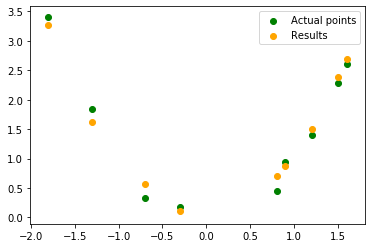

In [14]:
if __name__ == '__main__':
    main()